# Projeto de geometria de torre 230 kV
Comparação entre critérios de norma

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
from tabulate import tabulate
from math import degrees, radians, sin, cos, sqrt, exp
from IPython.display import HTML, display
from normaslt import types, nbr5422, nbr1985, iec
from normaslt.geral import plot_dimension

In [10]:
# Dados de projeto
v = 230.
vmax = 242
ftmo = vmax/v
# Vão
l = 450
vpvm = 0.7
# Fatores de gaps frente lenta
# "condutor-estrutura lateral"
ht = 20.
d = 2.
s = 1.5
kgfn = 1.45 + 0.35*(exp(-8. * s/d)-0.2) # Pegando cálculo na ref. Cigre original
kgff = 1.50 # "barramentos suportados por isolador", alpha 0.5
# Sobretensões (pu)
muft = 2.5
muff = 4.3
sigma = 0.1
# Suportabilidades: frequência industrial, frente lenta (positiva/ negatica), frente rápida
U60s = 760
U60m = 540
Ulp = 1080
Uln = 1160
Ur = 1265
# Vento de projeto (50 anos, 10 min)
Vp = 50.
cv = 0.16

In [17]:
# Isolamento na tensão máxima frequência industrial
kg = 1.35 * kgfn - 0.35 * kgfn**2
dft = nbr5422.espacFTFreqFund(Us=v, Ftmo=ftmo, kaff=1., kgff=kg, zff=0.)
kg = 1.35 * kgff - 0.35 * kgff**2
dff = nbr5422.espacFFFreqFund(Us=v, Ftmo=ftmo, kaff=1., kgff=kg, zff=0.)
Vp
print(dft, dff)

0.37191742740278033 0.5980449221577675


In [16]:
# Isolamento a sobretensões de frente lenta
dft = nbr5422.espacFTFrenteLenta(Us=v, Kcs=1.48, Fsfl=2.5, kafl=0.93, kg=kgfn, zfl=0.06)
dff = nbr5422.espacFFFrenteLenta(Us=v, Kcs=1.48, Fsfl=2.5, kafl=0.93, kg=kgff, zfl=0.06, alpha=0.33)
print(dft, dff)

1.4391658721303087 1.3164520151685635


In [ ]:
# Isolamento a sobretensões de frente rápida


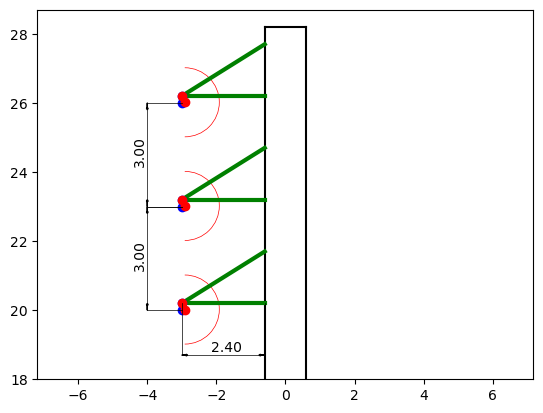

In [2]:
# Teste plotagem - torre 230 kV circuito duplo

# Posição das fases
xr = 3
x1a = -xr
x2a = -xr
x3a = -xr
x1b = xr
x2b = xr
x3b = xr
# Alturas relativas à fase mais baixa
y1a = 0.
y2a = 3.
y3a = 6.
y1b = 0.
y2b = 3.
y3b = 6.
hm = 1.5 # Altura da ancoragem do isolador de suspensao em relacao ao do line post
alfa = radians(10.) # Angulo vertical do isolador line post
lc = 0.2 # Comprimento da ferragem (m)
f = 10. # Flecha (m)
h = 10. # clearance (m)
# Ângulos de balanço
ang1 = radians(25.)
ang2 = radians(45.)
hbase = h + f + lc
y1t = y1a+hbase
y2t = y2a+hbase
y3t = y3a+hbase

# Estrutura
ltsup = 1.2
ltinf = 1.2
ht = y3t + hm + 0.5

plt.figure()
# Estrutura metalica
plt.plot([-ltinf/2, -ltsup/2], [0, ht],'k-')
plt.plot([ltinf/2, ltsup/2], [0, ht],'k-')
plt.plot([-ltsup/2, ltsup/2], [ht, ht],'k-')
# Misulas
plt.plot([-ltsup/2, x1a], [y1t, y1t],'g-', linewidth=3)
plt.plot([-ltsup/2, x2a], [y2t, y2t],'g-', linewidth=3)
plt.plot([-ltsup/2, x3a], [y3t, y3t],'g-', linewidth=3)
plt.plot([-ltsup/2, x1a], [y1t+hm, y1t],'g-', linewidth=3)
plt.plot([-ltsup/2, x2a], [y2t+hm, y2t],'g-', linewidth=3)
plt.plot([-ltsup/2, x3a], [y3t+hm, y3t],'g-', linewidth=3)
# Solo
plt.plot([-4.5, 4.5], [0, 0],'k-', linewidth=0.5)
plt.plot([x1a, x1a], [y1t, y1t-lc],'bo-')
plt.plot([x2a, x2a], [y2t, y2t-lc],'bo-')
plt.plot([x3a, x3a], [y3t, y3t-lc],'bo-')
plt.plot([x1a, x1a], [y1t-0.2, y1t-lc+0.2],'r-')
plt.plot([x2a, x2a], [y2t-0.2, y2t-lc+0.2],'r-')
plt.plot([x3a, x3a], [y3t-0.2, y3t-lc+0.2],'r-')
plt.plot([x1a, x1a+lc*sin(ang1)], [y1t, y1t-lc*cos(ang1)],'ro-')
plt.plot([x2a, x2a+lc*sin(ang1)], [y2t, y2t-lc*cos(ang1)],'ro-')
plt.plot([x3a, x3a+lc*sin(ang1)], [y3t, y3t-lc*cos(ang1)],'ro-')
plt.gca().add_patch(patches.Arc((x1a, y1t), 2*lc, 2*lc, theta1=-90., theta2=degrees(ang1)-90.,lw=0.5,color='r'))
plt.gca().add_patch(patches.Arc((x2a, y2t), 2*lc, 2*lc, theta1=-90., theta2=degrees(ang1)-90.,lw=0.5,color='r'))
plt.gca().add_patch(patches.Arc((x3a, y3t), 2*lc, 2*lc, theta1=-90., theta2=degrees(ang1)-90.,lw=0.5,color='r'))
# Espaçamentos
dist1 = 1.
dist2 = 2.
plt.gca().add_patch(patches.Arc((x1a+lc*sin(ang1), y1t-lc*cos(ang1)), 2*dist1, 2*dist1, theta1=-90., theta2=90.,lw=0.5,color='r'))
plt.gca().add_patch(patches.Arc((x2a+lc*sin(ang1), y2t-lc*cos(ang1)), 2*dist1, 2*dist1, theta1=-90., theta2=90.,lw=0.5,color='r'))
plt.gca().add_patch(patches.Arc((x3a+lc*sin(ang1), y3t-lc*cos(ang1)), 2*dist1, 2*dist1, theta1=-90., theta2=90.,lw=0.5,color='r'))

# teste de cota
plot_dimension(plt, (x1a,y1t-lc), (x2a,y2t-lc), offset=1)
plot_dimension(plt, (x2a,y2t-lc), (x3a,y3t-lc), offset=1)
plot_dimension(plt, (x1a,y1t), (-ltsup/2,y1t), offset=-1.5)
plt.axis('equal')
plt.gca().set_ylim(18, ht+0.5)
plt.show()

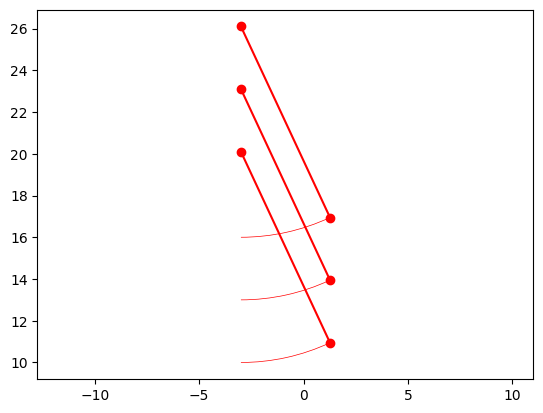

In [3]:
# Meio do vão
y1mv = y1a + h
y2mv = y2a + h
y3mv = y3a + h
l = f + lc
plt.figure()
plt.plot([x1a, x1a+l*sin(ang1)], [y1t, y1t-l*cos(ang1)],'ro-')
plt.plot([x2a, x2a+l*sin(ang1)], [y2t, y2t-l*cos(ang1)],'ro-')
plt.plot([x3a, x3a+l*sin(ang1)], [y3t, y3t-l*cos(ang1)],'ro-')
plt.gca().add_patch(patches.Arc((x1a, y1t), 2*l, 2*l, theta1=-90., theta2=degrees(ang1)-90.,lw=0.5,color='r'))
plt.gca().add_patch(patches.Arc((x2a, y2t), 2*l, 2*l, theta1=-90., theta2=degrees(ang1)-90.,lw=0.5,color='r'))
plt.gca().add_patch(patches.Arc((x3a, y3t), 2*l, 2*l, theta1=-90., theta2=degrees(ang1)-90.,lw=0.5,color='r'))
plt.axis('equal')
plt.show()